# Homework 2

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

formatNumber = lambda n: '{:,}'.format(n)
                          
def toCategoricDf(df, categorical_cols):
    categoricalColsDict = {}
    for c in categorical_cols:
        diffs = np.unique(df[c])
        categoricalColsDict[c] = []
        for d in diffs:
            cat_col_name = f"{c}_{d}"
            df[cat_col_name] = df[c] == d
            categoricalColsDict[c].append(cat_col_name)
    return categoricalColsDict, df
                          
def linearRegressionWithLogs(df, target_col, param_cols, categ_cols=[], fit_intercept=True):
    df = df.copy()
    model = LinearRegression(fit_intercept=fit_intercept)
    ys = df[target_col]

    cols = param_cols
    if len(categ_cols) > 0:
        categoricalColsDict, df = toCategoricDf(df, categ_cols)
        for c in categ_cols:
            col_names = categoricalColsDict[c]
            cols = [*cols, *col_names]
                          
    X = np.array(df[cols])

    model.fit(X, ys)
    preds = model.predict(X)
    cofs = model.coef_

    formula = "  +  ".join([f"{ formatNumber(cofs[i]) } * { cols[i] }" for i in range(len(cols))])
    if fit_intercept:
        formula += f" + {formatNumber(model.intercept_)}"

    mse = mean_squared_error(ys, preds)
    mse = formatNumber(mse)

    return model, mse, formula


## Task 1

In [47]:
df = pd.read_csv('./hw2_data/sales_3.csv')
df.head()

,Unnamed: 0,sales,area,cluster,bread,parking
0,0,1040090.60,107.0,4,1,1
1,1,795406.94,109.0,3,0,1
2,2,752838.25,112.0,3,1,0
3,3,808349.40,130.0,3,1,0
4,4,737828.00,150.0,2,0,1


Let's plot how area, cluster, bread and parking influence sales value.

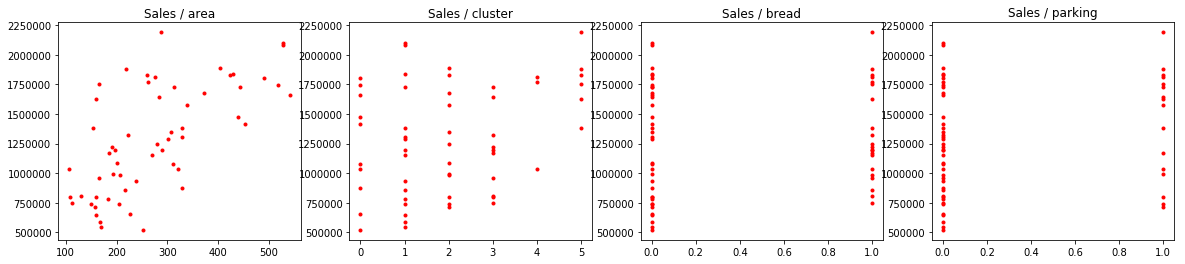

In [49]:
fig, axes = plt.subplots(1,4)

fig.set_size_inches((20,4))

for i in range(4):
    colName = df.columns[i+2]
    axes[i].set_title(f"Sales / {colName}")
    axes[i].plot(df[colName], df['sales'], 'r.')
    
plt.show()

We see that there are relations for all properties. For some it is less and for some bigger.

In [50]:
model1, mse, formula = linearRegressionWithLogs(df, target_col='sales', param_cols=['area'], categ_cols=['cluster', 'bread', 'parking'])
print("Model 1")
print(f"mse={mse}")
print(f"formula={formula}")

model2, mse, formula = linearRegressionWithLogs(df, target_col='sales', param_cols=['area'], categ_cols=['cluster', 'bread'])
print("\n\nModel 2")
print(f"mse={mse}")
print(f"formula={formula}")

model3, mse, formula = linearRegressionWithLogs(df, target_col='sales', param_cols=['area'], categ_cols=['cluster'])
print("\n\nModel 3")
print(f"mse={mse}")
print(f"formula={formula}")

Model 1
mse=6,956,388,081.792087
formula=4,160.7805554313345 * area  +  -652,714.4024427098 * cluster_0  +  -310,758.3259448471 * cluster_1  +  -138,791.26161691287 * cluster_2  +  95,550.50139723909 * cluster_3  +  373,103.6887895489 * cluster_4  +  633,609.7998176819 * cluster_5  +  864.1243386368811 * bread_0  +  -864.1243386363573 * bread_1  +  -9,992.296998116479 * parking_0  +  9,992.29699811677 * parking_1 + 0.0


Model 2
mse=6,988,764,343.330648
formula=4,150.734300902599 * area  +  -663,722.2165524211 * cluster_0  +  -321,080.280247674 * cluster_1  +  -142,960.65597170804 * cluster_2  +  96,455.67004750397 * cluster_3  +  382,106.337854711 * cluster_4  +  649,201.1448695882 * cluster_5  +  5,081.614325392981 * bread_0  +  -5,081.614325392923 * bread_1 + 0.0


Model 3
mse=6,999,698,561.893861
formula=4,156.458647417639 * area  +  -659,278.001420337 * cluster_0  +  -318,031.3020631992 * cluster_1  +  -139,510.06251281677 * cluster_2  +  94,916.8704823364 * cluster_3  +  377,383.

#### Conclusion

I would decide to use third one model (sales = area + cluster) because it's error measurment is just little big bigger than for other models but it is much simpler and represents dependency well. 

## Task 2

In [63]:
df = pd.read_csv('./hw2_data/task2.csv')
df.head()

,EVA,NET Sales,EBITDA
0,18,60,2.5
1,15,43,2.1
2,21,75,4.1
3,65,140,11.0
4,80,200,15.0


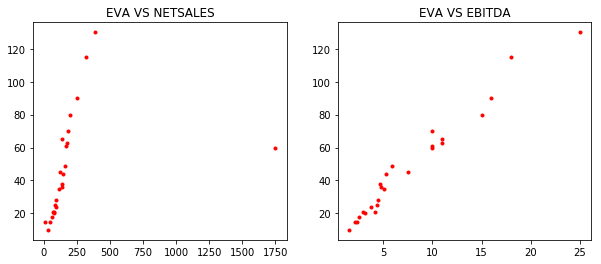

In [57]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches((10,4))

axes[0].plot(df['NET Sales'], df['EVA'], 'r.')
axes[0].set_title('EVA VS NETSALES')

axes[1].plot(df['EBITDA'], df['EVA'], 'r.')
axes[1].set_title('EVA VS EBITDA')

plt.show()

In [58]:
x_net_sales = 150
x_ebitda = 8.8

model1, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['EBITDA', 'NET Sales'], fit_intercept=False)
pred = model1.predict([[x_ebitda, x_net_sales]])[0]
print("Model 1")
print(f"mse={mse}")
print(f"formula={formula}")
print(f"EVA for netsales={x_net_sales} and ebitda={x_ebitda}  => {pred}")

###########

model2, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['EBITDA'], fit_intercept=False)
print("\n\nModel 2")
print(f"mse={mse}")
print(f"formula={formula}")
pred = model2.predict([[x_ebitda]])[0]
print(f"EVA for ebitda={x_ebitda}  => {pred}")

###########

model3, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['NET Sales'], fit_intercept=False)
print("\n\nModel 3")
print(f"mse={mse}")
print(f"formula={formula}")
pred = model3.predict([[x_net_sales]])[0]
print(f"EVA for netsales={x_net_sales} => {pred}")

Model 1
mse=48.05628156196115
formula=5.818972685351585 * EBITDA  +  0.0025532886057562914 * NET Sales
EVA for netsales=150 and ebitda=8.8  => 51.5899529219574


Model 2
mse=48.68738161572189
formula=5.879410297279757 * EBITDA
EVA for ebitda=8.8  => 51.73881061606187


Model 3
mse=2,060.444529668067
formula=0.08711513158429739 * NET Sales
EVA for netsales=150 => 13.067269737644608


Here we see that Net Sales represents EVA value very badly and we have to consider using only EBITDA for model prediction.

But there is one outlier for Net Sales. What if we can just remove it?

In [64]:
df[df['NET Sales'] > 1500]

,EVA,NET Sales,EBITDA
8,60,1750,10.0


In [65]:
df = df.drop(8)

And let's try to generate models again.

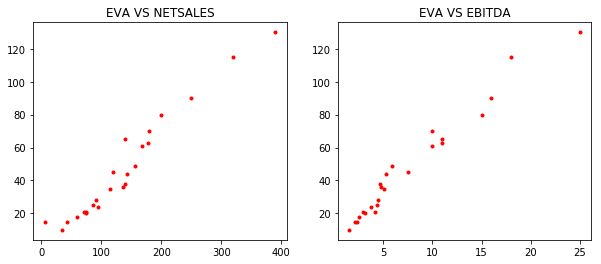

Model 1
mse=19.36645520807756
formula=2.9407375869012307 * EBITDA  +  0.1758427004880876 * NET Sales
EVA for netsales=150 and ebitda=8.8  => 52.25489583794397


Model 2
mse=50.652632529128
formula=5.873839999630462 * EBITDA
EVA for ebitda=8.8  => 51.68979199674807


Model 3
mse=49.59695407196515
formula=0.3453108592475799 * NET Sales
EVA for netsales=150 => 51.79662888713699


In [66]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches((10,4))

axes[0].plot(df['NET Sales'], df['EVA'], 'r.')
axes[0].set_title('EVA VS NETSALES')

axes[1].plot(df['EBITDA'], df['EVA'], 'r.')
axes[1].set_title('EVA VS EBITDA')

plt.show()

model1, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['EBITDA', 'NET Sales'], fit_intercept=False)
pred = model1.predict([[x_ebitda, x_net_sales]])[0]
print("Model 1")
print(f"mse={mse}")
print(f"formula={formula}")
print(f"EVA for netsales={x_net_sales} and ebitda={x_ebitda}  => {pred}")

###########

model2, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['EBITDA'], fit_intercept=False)
print("\n\nModel 2")
print(f"mse={mse}")
print(f"formula={formula}")
pred = model2.predict([[x_ebitda]])[0]
print(f"EVA for ebitda={x_ebitda}  => {pred}")

###########

model3, mse, formula = linearRegressionWithLogs(df, target_col='EVA', param_cols=['NET Sales'], fit_intercept=False)
print("\n\nModel 3")
print(f"mse={mse}")
print(f"formula={formula}")
pred = model3.predict([[x_net_sales]])[0]
print(f"EVA for netsales={x_net_sales} => {pred}")

Much better. Now we see that Net Sales is also a good variable in model.

But there is one more point. Let's check if Net Sales and EBITDA are depended variables:

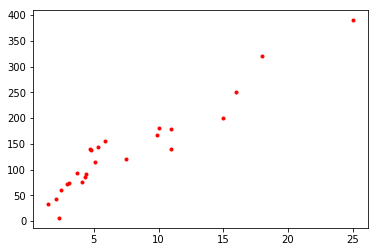

In [69]:
plt.plot(df['EBITDA'], df['NET Sales'], 'r.')

As we see they are completle depended and from domain knowledge we know this as well.

We also know that Net sales represents income money, but EBITDA represents how profitable this income is.

### Conclusion

I'd use model where that use only EBITDA variable

## Task 3

$y_{n+3} = 3y_{n+2} + 2y_{n+1} - 8y_{n}$

$y_1=5, y_2=18, y_3=35$

### Task 3.1

$  y_n =    $

## Task 4

In [70]:
df = pd.read_csv('./hw2_data/task_2.4.csv')
df.head()

,№ п/п,Вибірка 1: Y1,Вибірка 2: Y2
0,1,33,24
1,2,36,28
2,3,39,30
3,4,45,34
4,5,48,36


In [84]:
from scipy.optimize import minimize, rosen, rosen_der

x = np.array(df['№ п/п'])
y_1 = np.array(df['Вибірка 1: Y1'])
y_2 = np.array(df['Вибірка 2: Y2'])

def mseLoss(params, x, y, model):
    sq_error_sum = 0
    length = len(x)
    for i in range(length):
        sq_error_sum += (model(params, x[i]) - y[i]) ** 2
    return sq_error_sum / length

def model_a(params, x):
    [a,b,c] = params
    return a*(x**b) + c

def model_b(params, x):
    [a,b,c, d] = params
    return a*x**3 + b*x**2 + c*x + d

def model_c(params, x):
    [a,b,c] = params
    return a*b**x + c

In [85]:
minimization_a_1 = minimize(mseLoss, [1,1,1], args=(x,y_1,model_a))
minimization_a_2 = minimize(mseLoss, [1,1,1], args=(x,y_2,model_a))

minimization_b_1 = minimize(mseLoss, [1,1,1,1], args=(x,y_1,model_b))
minimization_b_2 = minimize(mseLoss, [1,1,1,1], args=(x,y_2,model_b))

minimization_c_1 = minimize(mseLoss, [1,1,1], args=(x,y_1,model_c))
minimization_c_2 = minimize(mseLoss, [1,1,1], args=(x,y_2,model_c))

<function matplotlib.pyplot.show(*args, **kw)>

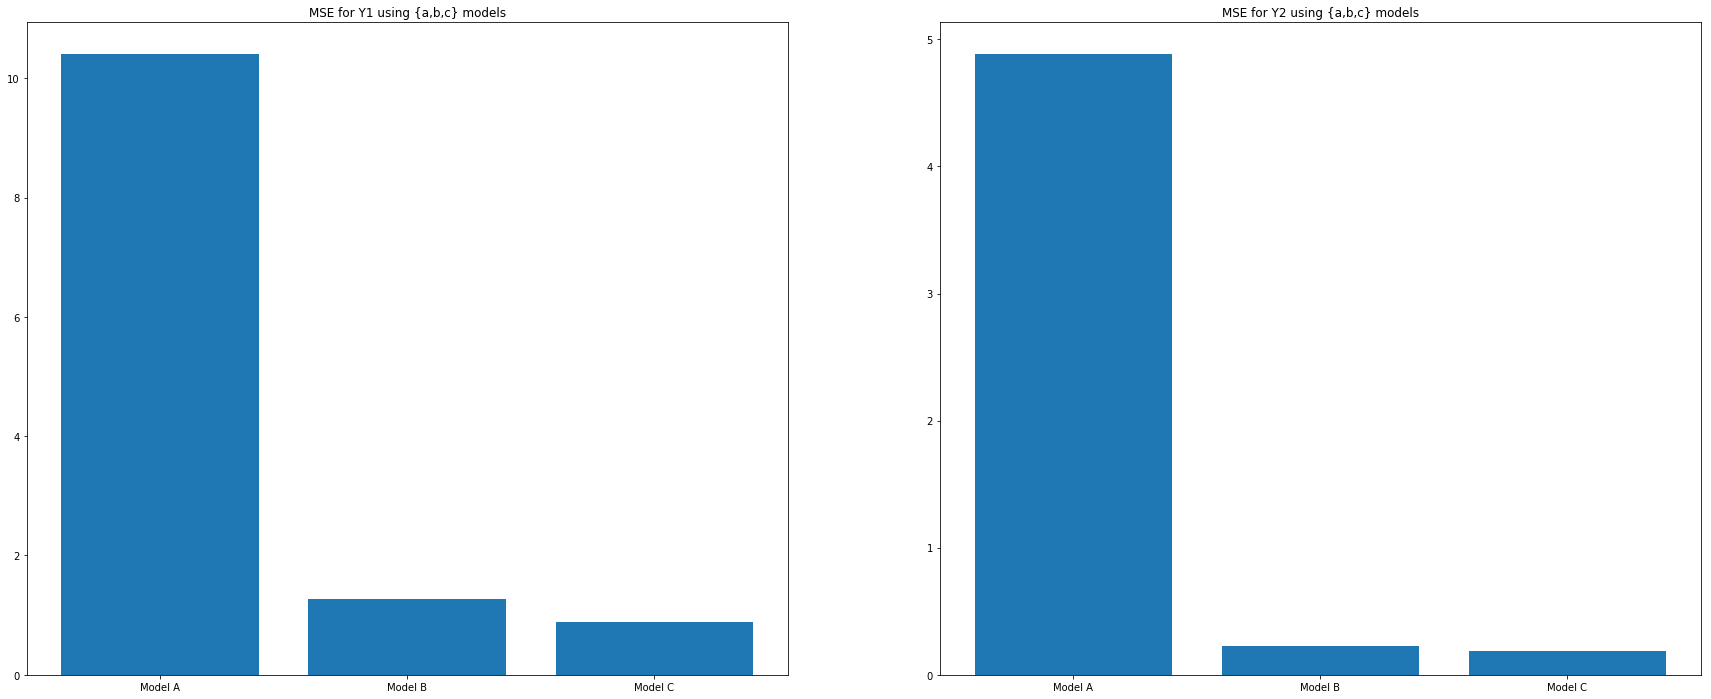

In [98]:
fig, (ax_1, ax_2) = plt.subplots(1,2)
fig.set_size_inches((30,12))

ax_1.bar(['Model A', 'Model B', 'Model C'], [minimization_a_1['fun'], minimization_b_1['fun'], minimization_c_1['fun'] ])
ax_1.set_title('MSE for Y1 using {a,b,c} models')


ax_2.bar(['Model A', 'Model B', 'Model C'], [minimization_a_2['fun'], minimization_b_2['fun'], minimization_c_2['fun'] ])
ax_2.set_title('MSE for Y2 using {a,b,c} models')

plt.show

From above charts we could see that Model C represetnts the best Y1 and Y2 samples.

## Task 5

In [100]:
df = pd.read_excel('./hw2_data/sales_alkazeltser.xlsx')
df.head()

,Год,Месяц,t,Алка-зельтцер
0,2003,1,1,27756.793752
1,2003,2,2,17198.926264
2,2003,3,3,20786.674302
3,2003,4,4,25562.645106
4,2003,5,5,23282.538261


In [110]:
model, mse, formula = linearRegressionWithLogs(df, categ_cols=['Месяц'], target_col='Алка-зельтцер', param_cols=[])
print("Model 1")
print(f"mse={mse}")
print(f"formula={formula}")

Model 1
mse=117,418,786.05024593
formula=-4.099206016593807e+17 * Месяц_1  +  -4.099206016593912e+17 * Месяц_2  +  -4.0992060165938714e+17 * Месяц_3  +  -4.09920601659382e+17 * Месяц_4  +  -4.099206016593835e+17 * Месяц_5  +  -4.099206016593831e+17 * Месяц_6  +  -4.099206016593828e+17 * Месяц_7  +  -4.0992060165938355e+17 * Месяц_8  +  -4.099206016593877e+17 * Месяц_9  +  -4.099206016593876e+17 * Месяц_10  +  -4.099206016593881e+17 * Месяц_11  +  -4.099206016593694e+17 * Месяц_12 + 4.0992060165941357e+17


In [119]:
X = np.zeros((len(df), 12))
for i,r in df.iterrows():
    X[i, int(r['Месяц']) - 1] = 1

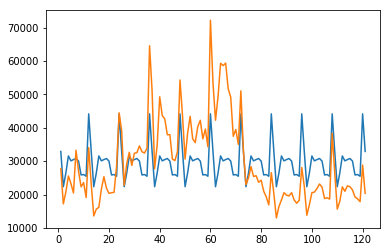

In [129]:
plt.plot(df['t'], model.predict(X))
plt.plot(df['t'], df['Алка-зельтцер'])

Above we could see that model found out months trend. Blue lines represents model prediction and orange real values.

But finding trend in years would be impossible with this data. As we can see there is low trend in left, high in the middle and low again in the right trends. There are no dependency visible so trend prediction in future year is not possible.

## Task 6

$Q_D=3000-2000×P$ AND $TC=120+0.2\timesQ$

So 

$P = 1.5 - \dfrac{1}{2000}Q_D $

$P = 1.3 \times P_{factory}$

$P_{factory} = \dfrac{P}{1.3} = \dfrac{1.5 - \dfrac{1}{2000}Q_D}{1.3}$

Let's consider that produced and demand quantities are equal, then:

$TR = P_{factory} \times Q = \dfrac{P}{1.3} = \dfrac{1.5 - \dfrac{1}{2000}Q}{1.3} \times Q$

$Profit = TR - TC = \dfrac{1.5 - \dfrac{1}{2000}Q}{1.3} \times Q - (120 + 0.2\times Q)$

Text(0,0.5,'Profit')

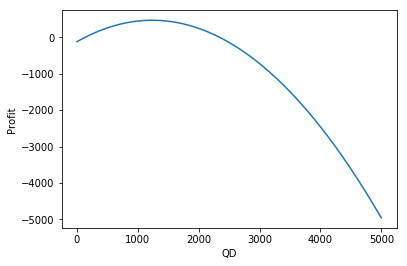

In [137]:
def profit(q):
    return ( (1.5 - 1/2000 * q) / 1.3 ) * q - (120 + 0.2 * q)

qs = [q for q in range(1,5000)]
profits = [profit(q) for q in qs]

plt.plot(qs, profits)
plt.xlabel('QD')
plt.ylabel('Profit')

In [135]:
max_q = qs[np.argmax(profits)]
print(f"Quantity value with max profit = {max_q}")

Quantity value with max profit = 1240


## Task 7

$q_a = 120 - 3.5 \times p_a$ AND $q_b = 80 - 2.7 \times p_b$

$p_a = \dfrac{120 - q_a}{3.5}$ AND $p_b = \dfrac{80 - q_b}{2.7}$

$TR = q_a \times p_a + q_b \times p_b $ AND $TC = 15 \times (q_a + q_b)$

$Profit = TR - TC = q_a \times p_a + q_b \times p_b - 15 \times (q_a + q_b) = q_a \times \dfrac{120 - q_a}{3.5} + q_b \times \dfrac{80 - q_b}{2.7} - 15 \times (q_a + q_b)$

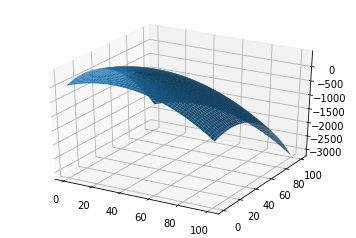

In [150]:
from mpl_toolkits.mplot3d import Axes3D

def profit(q_a, q_b):
    return q_a * ((120 - q_a) / 3.5) + q_b * (( 80 - q_b) / 2.7) - 15 * (q_a + q_b)

q_to = 100
qs = [q for q in range(1,q_to+1)]

profits = [profit(qs[i], qs[j]) for j in range(len(qs)) for i in range(len(qs))]
Z = np.array(profits).reshape((q_to,q_to))

X,Y = np.meshgrid(qs,qs)

ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

In [156]:
[a_i, b_i] = np.unravel_index(Z.argmax(), Z.shape)
print(f"A = {qs[a_i]}, B = {qs[b_i]}")

A = 20, B = 34
